In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, matthews_corrcoef
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

## 🌿 Decision Tree Regression

This function uses a **Decision Tree Regressor** to predict diamond carat weight from a selected feature (`x_label`, e.g., `xlength`).

### Key Details:
- The input feature is expanded using a **polynomial transformation (degree = 3)**.
- A pipeline is built with:
  - `StandardScaler` for normalization.
  - `DecisionTreeRegressor` with controlled complexity (`max_depth=4`, `min_samples_leaf=5`).

### Outputs:
- **R² Score**: Measures how well the model explains the variance in the target (`carat`).
- A **tree visualization** is plotted using `plot_tree` from `sklearn.tree`.
- Execution time is printed.

This method allows us to visualize the model's decision-making and understand how it partitions the feature space to make predictions.

In [3]:
def decision_tree_regression(data, x_label, y_label):
    start_time = time.time()
    x = data[x_label].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()

    polynomial_features = PolynomialFeatures(degree=3, include_bias=True)
    x_poly = polynomial_features.fit_transform(x)

    decision_tree = Pipeline([
        ("scaler", StandardScaler()),
        ("decision_tree", DecisionTreeRegressor(random_state=0, max_depth=4, min_samples_leaf=5))
    ]).fit(x_poly, y)

    r_sq = decision_tree.score(x_poly, y)

    x_range = np.linspace(x.min(), x.max(), 20).reshape(-1, 1)
    x_range_poly = polynomial_features.transform(x_range)
    y_pred = decision_tree.predict(x_range_poly)

    print("Decision Tree Regression")
    print('R^2:', r_sq)

    plt.figure(figsize=(10, 6))
    plot_tree(decision_tree['decision_tree'], filled=True, feature_names=None, rounded=True, fontsize=10)
    plt.show()
    print("Time of execution: ", time.time() - start_time, "seconds")

## 🌳 Random Forest Regression

This function applies a **Random Forest Regressor** to predict the carat weight of a diamond based on a single input feature (`x_label`, e.g., `xlength`).

### Key Details:
- Input feature is expanded using a **polynomial transformation (degree = 3)**.
- A pipeline is built with:
  - `StandardScaler` for input normalization.
  - `RandomForestRegressor` for ensemble regression using multiple decision trees (`max_depth=4`, `min_samples_leaf=5`).

### Outputs:
- **R² Score** – Measures how well the ensemble model fits the data.
- **Predicted values** are generated across a linear range for plotting or evaluation.
- **Execution Time** – Prints the duration of training and prediction.

This method leverages the power of multiple trees to reduce overfitting and improve regression performance on structured, non-linear data.

In [4]:
def random_forest_regression(data, x_label, y_label):
    start_time = time.time()
    x = data[x_label].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()

    polynomial_features = PolynomialFeatures(degree=3, include_bias=True)
    x_poly = polynomial_features.fit_transform(x)

    random_forest = Pipeline([
        ("scaler", StandardScaler()),
        ("random_forest", RandomForestRegressor(random_state=0, max_depth=4, min_samples_leaf=5))
    ]).fit(x_poly, y)

    r_sq = random_forest.score(x_poly, y)

    x_range = np.linspace(x.min(), x.max(), 20).reshape(-1, 1)
    x_range_poly = polynomial_features.transform(x_range)
    y_pred = random_forest.predict(x_range_poly)

    print("Random Forest Regression")
    print('R^2:', r_sq)
    print("Time of execution: ", time.time() - start_time, "seconds")

## 🌿 Decision Tree Classification

This function uses a **Decision Tree Classifier** with the **entropy** criterion to classify diamonds as `cut_Ideal` or not, based on four selected features.

### Key Details:
- Input features (`x_labels`) are:
  - `table`, `xlength`, `ywidth`, `zdepth`
- Features are transformed using a **polynomial expansion (degree = 3)** to capture non-linear patterns.
- A pipeline is built with:
  - `StandardScaler` for feature normalization
  - `DecisionTreeClassifier` with:
    - `criterion="entropy"`
    - `max_depth=5`
    - `min_samples_leaf=5`

### Outputs:
- **R² Score** – classification model performance
- **Matthews Correlation Coefficient (MCC)** – robust performance metric for imbalanced classes
- **Confusion Matrix**
- **Classification Report** (Precision, Recall, F1-Score)
- **Decision Tree Visualization** – using `plot_tree` for interpretability
- **Execution Time**

This interpretable model allows you to visualize how features influence the classification of diamonds as "Ideal" or not.

In [5]:
def decision_tree_classification(data, x_labels, y_label):
    start_time = time.time()
    x1 = data[x_labels[0]].to_numpy().reshape(-1, 1)
    x2 = data[x_labels[1]].to_numpy().reshape(-1, 1)
    x3 = data[x_labels[2]].to_numpy().reshape(-1, 1)
    x4 = data[x_labels[3]].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()
    
    x = np.concatenate((x1, x2, x3, x4), axis=1)
    
    x = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x)

    decision_tree = Pipeline ([
        ("scaler", StandardScaler()),
        ("decision_tree", DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=5, min_samples_leaf=5))
    ])
        
    decision_tree = decision_tree.fit(x, y)

    y_pred = decision_tree.predict(x)
    
    print("Decision Tree Classification using Entropy criterion")
    print("coefficient of determinantion (R^2): ", decision_tree["decision_tree"].score(x, y))
    print("matthews_corrcoef: ", matthews_corrcoef(y, y_pred))
    print()
    print("Confusion matrix: ")
    print(confusion_matrix(y, y_pred))
    print()
    print("Classification report: ")
    print(classification_report(y, y_pred))
    print()

    plt.figure(figsize=(10, 6))
    plot_tree(decision_tree['decision_tree'], filled=True, feature_names=None, rounded=True, fontsize=10)
    plt.show()
    print("Time of execution: ", time.time() - start_time, "seconds")

## 🌳 Random Forest Classification

This function uses a **Random Forest Classifier** to predict whether a diamond has an `Ideal` cut or not, based on multiple features.

### Key Details:
- Input features: `table`, `xlength`, `ywidth`, `zdepth`
- Features are transformed using a **polynomial expansion (degree = 3)** to capture interactions and non-linearities.
- A pipeline is built with:
  - `StandardScaler` for normalization
  - `RandomForestClassifier` with:
    - `criterion="gini"`
    - `n_estimators=10` trees
    - `random_state=0` for reproducibility

### Outputs:
- **R² Score**
- **Matthews Correlation Coefficient (MCC)**
- **Confusion Matrix**
- **Classification Report** (precision, recall, f1-score, support)
- **Execution Time**

Random Forest improves classification performance by aggregating predictions from multiple trees and reducing overfitting.

In [6]:
def random_forest_classification(data, x_labels, y_label): 
    start_time = time.time()
    x1 = data[x_labels[0]].to_numpy().reshape(-1, 1)
    x2 = data[x_labels[1]].to_numpy().reshape(-1, 1)
    x3 = data[x_labels[2]].to_numpy().reshape(-1, 1)
    x4 = data[x_labels[3]].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()
    
    x = np.concatenate((x1, x2, x3, x4), axis=1)
    
    x = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x)

    random_forest = Pipeline ([
        ("scaler", StandardScaler()),
        ("random_forest", RandomForestClassifier(criterion="gini", random_state=0, n_estimators=10))
    ])
        
    random_forest = random_forest.fit(x, y)

    y_pred = random_forest.predict(x)

    print("Random Forest Classification using Gini criterion")
    print("coefficient of determinantion (R^2): ", random_forest["random_forest"].score(x, y))
    print("matthews_corrcoef: ", matthews_corrcoef(y, y_pred))
    print()
    print("Confusion matrix: ")
    print(confusion_matrix(y, y_pred))
    print()
    print("Classification report: ")
    print(classification_report(y, y_pred))
    print()
    print("Time of execution: ", time.time() - start_time, "seconds")

## 📥 Load and Explore the Dataset

The diamonds dataset is loaded and prepared for analysis:

- **Columns Renamed**:
  - `x → xlength`
  - `y → ywidth`
  - `z → zdepth`
  > These represent the diamond’s physical dimensions.

- **Overview Steps**:
  - Display the first few rows of the dataset
  - Print dataset shape and column names
  - Check for missing values
  - Show data types and summary statistics
  - Count unique values in each column

This step ensures that the data is clean, well-structured, and ready for preprocessing and modeling.

In [7]:
data = pd.read_csv("data/diamonds.csv")
data.rename(columns={'x': 'xlength', 'y': 'ywidth', 'z':'zdepth'}, inplace=True)

print(data.head(), "\n")
print("Shape: ", data.shape)
print("Columns: ", data.columns, "\n")
print("Missing Values per Column:\n", data.isnull().sum(), "\n")
print(data.info())
print(data.describe())
print("Unique Values per Column:\n", data.nunique(), "\n")

   Unnamed: 0  carat      cut color clarity  depth  table  price  xlength  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326     3.95   
1           2   0.21  Premium     E     SI1   59.8   61.0    326     3.89   
2           3   0.23     Good     E     VS1   56.9   65.0    327     4.05   
3           4   0.29  Premium     I     VS2   62.4   58.0    334     4.20   
4           5   0.31     Good     J     SI2   63.3   58.0    335     4.34   

   ywidth  zdepth  
0    3.98    2.43  
1    3.84    2.31  
2    4.07    2.31  
3    4.23    2.63  
4    4.35    2.75   

Shape:  (53940, 11)
Columns:  Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'xlength', 'ywidth', 'zdepth'],
      dtype='object') 

Missing Values per Column:
 Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
xlength       0
ywidth        0
zdepth        0
dtype: int64 

<class 'pandas.core

## 🧹 Data Preprocessing: One-Hot Encoding

To prepare the dataset for machine learning models:

- **One-hot encoding** is applied to categorical variables:
  - `cut`, `color`, and `clarity`
- This converts each category into its own binary column (0 or 1).
- The first column (likely an ID or unnamed index column) is dropped to avoid redundancy or noise.

### Output:
- Final dataset shape
- Updated column names
- Confirmation of missing values (if any)

This step ensures all input features are numeric and model-ready.

In [8]:
data = pd.get_dummies(data, columns=["cut", "color", "clarity"])
data = data.drop(data.columns[0], axis=1)

print("Final Shape: ", data.shape)
print("Final Columns: ", data.columns, "\n")
print("Final Missing Values per Column:\n", data.isnull().sum(), "\n")

Final Shape:  (53940, 27)
Final Columns:  Index(['carat', 'depth', 'table', 'price', 'xlength', 'ywidth', 'zdepth',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object') 

Final Missing Values per Column:
 carat            0
depth            0
table            0
price            0
xlength          0
ywidth           0
zdepth           0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64 



## 📊 Feature Correlation Analysis

This step visualizes the relationships between all numerical features using a **correlation matrix**.

- The `.corr()` method computes **Pearson correlation coefficients** between variables.
- A **Seaborn heatmap** is used for visual inspection of:
  - Strong positive/negative correlations
  - Multicollinearity between features
  - Relevance of features to target variables like `carat` or `cut_Ideal`

### Why This Matters:
Understanding feature correlations helps with:
- Feature selection
- Reducing redundancy
- Gaining insights into the data structure

Correlation Matrix:
                   carat     depth     table     price   xlength    ywidth  \
carat          1.000000  0.028224  0.181618  0.921591  0.975094  0.951722   
depth          0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341   
table          0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760   
price          0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421   
xlength        0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701   
ywidth         0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000   
zdepth         0.953387  0.094924  0.150929  0.861249  0.970772  0.952006   
cut_Fair       0.091844  0.280657  0.125332  0.018728  0.080644  0.068822   
cut_Good       0.034196  0.136114  0.175174 -0.000312  0.030349  0.032187   
cut_Ideal     -0.163660 -0.022778 -0.549599 -0.097175 -0.162674 -0.153158   
cut_Premium    0.116245 -0.198306  0.338072  0.095706  0.126820  0.107943   
cut_Very Good  0.009568  0.025828  0.119971  0.006593  

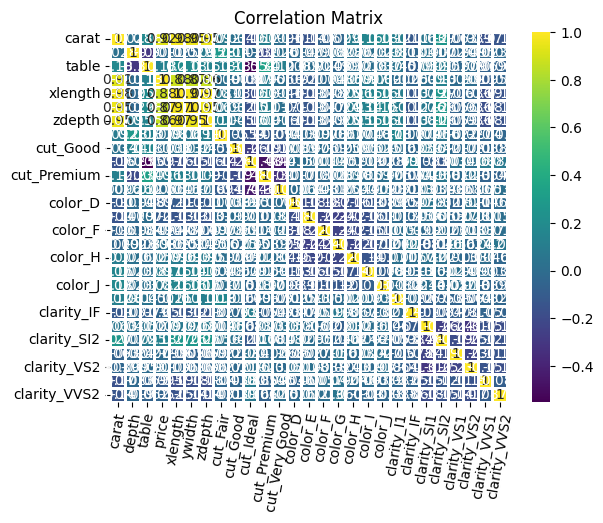

In [9]:
print("Correlation Matrix:\n", data.corr())
plt.figure(dpi=100)
plt.title("Correlation Matrix")
sns.heatmap(data.corr(), annot=True, lw=1, cmap="viridis", linecolor='white')
plt.xticks(rotation=80)
plt.show()

## 🌿 Decision Tree Regression: Predicting Carat from xlength

This call applies a **Decision Tree Regressor** to predict the `carat` of a diamond based on its `xlength`.

- The input (`xlength`) is expanded using **polynomial features (degree = 3)** to capture non-linear relationships.
- A pipeline standardizes the data and fits a **DecisionTreeRegressor** with:
  - `max_depth = 4`
  - `min_samples_leaf = 5`

### Output:
- **R² Score** – Model fit quality
- A **visual representation** of the trained tree using `plot_tree`
- **Execution time** for the process

This helps identify how well a single feature like `xlength` can explain the variability in diamond carat weight.

Decision Tree Regression
R^2: 0.9867527989339743


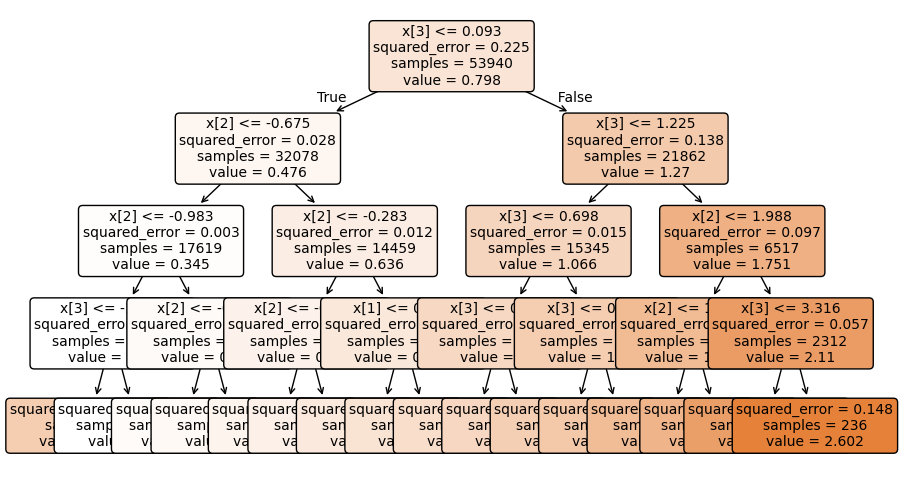

Time of execution:  0.3220248222351074 seconds


In [10]:
decision_tree_regression(data, "xlength", "carat")

## 🌿 Decision Tree Classification: Predicting Ideal Cut Quality

This step applies a **Decision Tree Classifier** to predict whether a diamond is classified as `cut_Ideal` based on the following features:

- `table`
- `xlength`
- `ywidth`
- `zdepth`

### Key Details:
- Features are expanded using **polynomial features (degree = 3)** to model non-linear interactions.
- The classifier uses:
  - `criterion="entropy"` for information gain
  - `max_depth=5`
  - `min_samples_leaf=5`
- The model is wrapped in a pipeline with **standardization**.

### Outputs:
- **R² Score**
- **Matthews Correlation Coefficient (MCC)**
- **Confusion Matrix**
- **Classification Report**
- **Decision Tree Visualization**

This interpretable model shows how specific physical characteristics relate to the ideal cut classification.

Decision Tree Classification using Entropy criterion
coefficient of determinantion (R^2):  0.6004634779384501
matthews_corrcoef:  0.6777895048343734

Confusion matrix: 
[[24354  8035]
 [ 1311 20240]]

Classification report: 
              precision    recall  f1-score   support

       False       0.95      0.75      0.84     32389
        True       0.72      0.94      0.81     21551

    accuracy                           0.83     53940
   macro avg       0.83      0.85      0.83     53940
weighted avg       0.86      0.83      0.83     53940




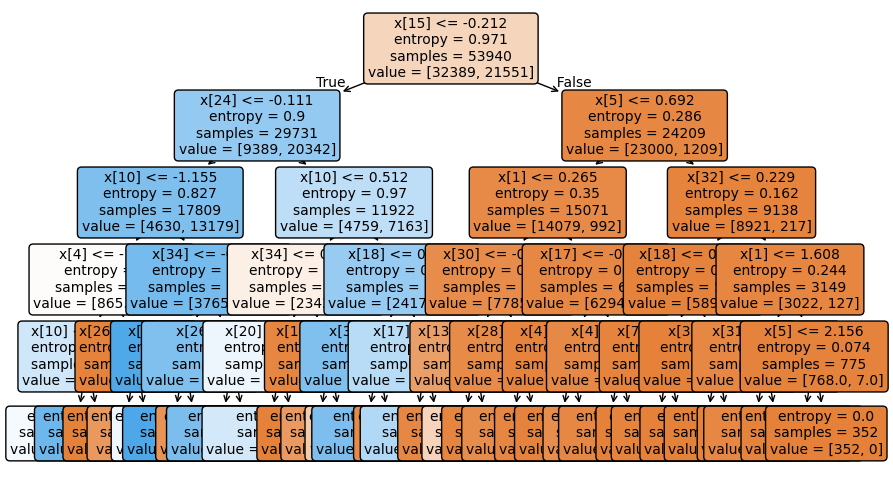

Time of execution:  1.1755199432373047 seconds


In [11]:
decision_tree_classification(data, ["table", "xlength", "ywidth", "zdepth"], "cut_Ideal")

## 🌳 Random Forest Regression: Predicting Carat from xlength

This step applies a **Random Forest Regressor** to predict a diamond's `carat` based on its `xlength`.

### Key Details:
- Input feature is transformed with **polynomial features (degree = 3)**.
- A pipeline is used to:
  - **Scale** the data with `StandardScaler`
  - **Train** a `RandomForestRegressor` with:
    - `max_depth = 4`
    - `min_samples_leaf = 5`
    - `random_state = 0` for reproducibility

### Outputs:
- **R² Score** – Indicates how well the ensemble model explains the variance in carat weight.
- **Predictions** over a defined range for visualization (if applicable).
- **Execution time**

This ensemble method improves robustness and reduces overfitting compared to a single decision tree.

In [12]:
random_forest_regression(data, "xlength", "carat")

Random Forest Regression
R^2: 0.9885509869358816
Time of execution:  2.001645565032959 seconds


## 🌳 Random Forest Classification: Predicting Ideal Cut Quality

This step uses a **Random Forest Classifier** to predict whether a diamond is classified as `cut_Ideal` using the following features:

- `table`
- `xlength`
- `ywidth`
- `zdepth`

### Key Details:
- Input features are transformed using **polynomial features (degree = 3)** to capture non-linear patterns.
- A pipeline includes:
  - `StandardScaler` for normalization
  - `RandomForestClassifier` with:
    - `criterion = "gini"`
    - `n_estimators = 10`
    - `random_state = 0` for reproducibility

### Outputs:
- **R² Score**
- **Matthews Correlation Coefficient (MCC)**
- **Confusion Matrix**
- **Classification Report**
- **Execution Time**

This ensemble classifier enhances performance and stability by aggregating decisions from multiple decision trees.


In [13]:
random_forest_classification(data, ["table", "xlength", "ywidth", "zdepth"], "cut_Ideal")

Random Forest Classification using Gini criterion
coefficient of determinantion (R^2):  0.6004634779384501
matthews_corrcoef:  0.9526550508568141

Confusion matrix: 
[[31796   593]
 [  632 20919]]

Classification report: 
              precision    recall  f1-score   support

       False       0.98      0.98      0.98     32389
        True       0.97      0.97      0.97     21551

    accuracy                           0.98     53940
   macro avg       0.98      0.98      0.98     53940
weighted avg       0.98      0.98      0.98     53940


Time of execution:  1.4013917446136475 seconds
